In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error

from sklearn.inspection import permutation_importance

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

seed = 42

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1095 non-null   float64
 1   Neighborhood   1095 non-null   float64
 2   GrLivArea      1095 non-null   float64
 3   GarageArea     1095 non-null   float64
 4   GarageCars     1095 non-null   float64
 5   YearBuilt      1095 non-null   float64
 6   TotalBsmtSF    1095 non-null   float64
 7   BsmtQual       1095 non-null   float64
 8   ExterQual      1095 non-null   float64
 9   KitchenQual    1095 non-null   float64
 10  1stFlrSF       1095 non-null   float64
 11  MSSubClass     1095 non-null   float64
 12  GarageYrBlt    1095 non-null   float64
 13  FullBath       1095 non-null   float64
 14  YearRemodAdd   1095 non-null   float64
 15  2ndFlrSF       1095 non-null   float64
 16  GarageFinish   1095 non-null   float64
 17  Foundation     1095 non-null   float64
 18  Exterior

In [8]:
train.describe()

,OverallQual,Neighborhood,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,BsmtQual,ExterQual,KitchenQual,...,CentralAir,HalfBath,MasVnrArea,LotShape,BedroomAbvGr,SaleCondition,BsmtExposure,Condition1,MasVnrType,SalePrice
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.00000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,6.129680,12.033296,1531.213699,477.539726,1.784475,1971.107763,1060.76347,12.038982,12.031049,12.042561,...,12.009091,0.380822,102.990868,12.003290,2.896804,12.021803,12.028014,12.015954,12.127491,12.031049
std,1.366746,0.293965,527.197908,210.563755,0.733836,30.605697,443.87948,0.259568,0.268629,0.253561,...,0.124499,0.496972,171.444193,0.130448,0.806361,0.131131,0.108889,0.083148,0.086018,0.393483
min,1.000000,11.401853,334.000000,0.000000,0.000000,1872.000000,0.00000,11.643800,11.350407,11.623596,...,11.559743,0.000000,0.000000,11.904968,0.000000,11.529256,11.957611,11.695247,11.909130,10.460242
25%,5.000000,11.798104,1148.000000,349.500000,1.000000,1953.500000,795.50000,11.824080,11.849398,11.841823,...,12.043554,0.000000,0.000000,11.904968,2.000000,12.001199,11.957611,12.033205,12.103486,11.775290
50%,6.000000,12.096258,1478.000000,484.000000,2.000000,1972.000000,996.00000,12.173033,11.849398,11.841823,...,12.043554,0.000000,0.000000,11.904968,3.000000,12.001199,11.957611,12.033205,12.103486,12.013701
75%,7.000000,12.207673,1795.000000,576.000000,2.000000,2001.000000,1299.50000,12.173033,12.310433,12.219889,...,12.043554,1.000000,165.500000,12.146853,3.000000,12.001199,12.130807,12.033205,12.103486,12.278393
max,10.000000,12.650415,5642.000000,1418.000000,4.000000,2010.000000,6110.00000,12.669807,12.799176,12.669807,...,12.043554,2.000000,1378.000000,12.371488,8.000000,12.423656,12.278393,12.273731,12.392552,13.521139


In [10]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1].to_frame()
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1].to_frame()

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=seed)

In [14]:
print('X_train shpae : ',X_train.shape,
      '\nX_test shpae : ',X_test.shape,
      '\nX_val shpae : ',X_val.shape
     )

X_train shpae :  (1095, 45) 
X_test shpae :  (255, 45) 
X_val shpae :  (110, 45)


### ElasticNet

In [17]:
ss = StandardScaler().set_output(transform='pandas')
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)
y_val = ss.transform(y_val)

In [201]:
en = Pipeline([
    ('poly',PolynomialFeatures()),
    ('pca',PCA()),
    ('ss',StandardScaler()),
    ('en',ElasticNet())
])

In [203]:
param_dist = {
    'poly__degree':[1,2],
    'pca__n_components':[10,13,15],
    'en__alpha':np.arange(0.1,1.1,0.1),
    'en__l1_ratio':np.arange(0.1,1.1,0.1),
    'en__max_iter':[1000,10000],
    'en__tol':[0.001,0.0001,0.00001]
}

random_search = RandomizedSearchCV(
    en,
    n_iter=60,
    param_distributions = param_dist,
    return_train_score=True,
    n_jobs=-1,
    random_state=seed
)

In [205]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('pca', PCA()),
                                             ('ss', StandardScaler()),
                                             ('en', ElasticNet())]),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'en__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'en__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'en__max_iter': [1000, 10000],
                                        'en__tol': [0.001, 0.0001, 1e-05],
                                        'pca__n_components': [10, 13, 15],
                                        'poly__degree': [1, 2]},
                   random_state=42, return_train_score=True)

In [206]:
random_search.best_params_

{'poly__degree': 1,
 'pca__n_components': 13,
 'en__tol': 0.0001,
 'en__max_iter': 10000,
 'en__l1_ratio': 0.1,
 'en__alpha': 0.1}

In [233]:
print('Train MSE: ',mean_squared_error(y_train,random_search.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,random_search.predict(X_test)))
print('CV R2 Score: ',random_search.best_score_)
print('Trian R2 Score: ',r2_score(y_train,random_search.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,random_search.predict(X_test)))

Train MSE:  0.1571047045584814
Test MSE:  0.1641803845855169
CV R2 Score:  0.8153920126412004
Trian R2 Score:  0.8428952954415185
Test R2 Score:  0.8573636143744046


In [35]:
# A function to visualize Hyperparameter space

def plot_hpperform(
                searchcv,
                row=None,
                col=2,
                figsize=(15,15),
                line_kws={'errorbar':None},
                point_kws={},
                best_color=None,
                scatter_kws={'alpha':.4},
                strip_kws={'alpha':.4},
                fontsize=12,
                plot_train_score=False,
                train_color=None,
                points=True,
                best=True
                ):


    '''
    Plot hyperparameter peroformance in hyperparameter space
    '''
    # import seaborn
    try:
        import seaborn as sns
    except ImportError:
        import subprocess
        import sys
        print("Installing seaborn...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
        import seaborn as sns

    # initializing necessary variables
    cv_results_ = searchcv.cv_results_
    keys = cv_results_.keys()
    param_ = [i for i in keys if 'param_' in i]
    row = len(param_) // col + 1 if not row else row
    n_splits_ = searchcv.n_splits_
    
    fig, axes = plt.subplots(row,col,figsize=figsize)
    try:
        axes = axes.flatten() 
    except AttributeError:
        axes = np.array([axes])

    # delete unncessary axes
    unused = (row*col) - len(param_)
    for i in range(unused):
        axes[-(i+1)].remove()

    # setting up x and y for plotting
    all_cv_score = []
    if plot_train_score:
        all_train_score = [] 
        train_color = sns.color_palette()[1] if not train_color else train_color
    for j in range(n_splits_):
        all_cv_score.extend(cv_results_[f'split{j}_test_score'])
        if plot_train_score:
            all_train_score.extend(cv_results_[f'split{j}_train_score'])

    # looping over to plot all the hyperparameters vs score        
    for i in range(len(param_)):
        ax = axes[i]   
        
        kws = dict(
            y= all_cv_score,
            x= np.tile(cv_results_[param_[i]],5),
            ax=ax,
        )

        # avoiding error for None
        kws['x'] = ['None' if i is None else i for i in kws['x'] ]
        
        
        if plot_train_score:
            train_kws = dict(
                y= all_train_score,
                x= np.tile(cv_results_[param_[i]],5),
                ax=ax,
                color=train_color
            )
            train_kws['x'] = ['None' if i is None else i for i in train_kws['x']]

        # plotting pointplot and stripplot for categorical values
        if isinstance(kws['x'][0],str):
            sns.pointplot(**kws,**point_kws,label='CV Scores')
            if points:
                sns.stripplot(**kws,**strip_kws,label='CV Scores')
            
            # plotting train scores
            if plot_train_score:
                sns.pointplot(**train_kws,**point_kws,label='train_score')
                if points:
                  sns.stripplot(**train_kws,**strip_kws,label='train_score')

            # plotting the best parameter
            if best:
                best_score_ = searchcv.best_score_
                best_x = [searchcv.best_params_[param_[i].replace('param_','')]]
                best_x = ['None' if best_x[0] is None else best_x[0]]
                best_color = sns.color_palette()[3] if not best_color else best_color
                sns.pointplot(y=best_score_,x=best_x,color=best_color,ax=ax,label='best Hyperparameter')
        
        # plotting lineplot and scatterplot for nuumerical values
        else:
            sns.lineplot(**kws,**line_kws,label='CV Scores')
            if points:
                sns.scatterplot(**kws,**scatter_kws,label='CV Scores')

            # plotting train scores
            if plot_train_score:
                sns.lineplot(**train_kws,**line_kws,label='train_score')
                if points:
                    sns.scatterplot(**train_kws,**scatter_kws,label='train_score')
            
            # plotting the best parameter
            if best:
                best_score_ = searchcv.best_score_
                best_x = [searchcv.best_params_[param_[i].replace('param_','')]]
                best_color = sns.color_palette()[3] if not best_color else best_color
                sns.scatterplot(y=best_score_,x=best_x,color=best_color,ax=ax,label='best Hyperparameter')
        
        ax.set_xlabel(param_[i].replace('param_',''),fontsize=fontsize)
        ax.set_ylabel('score',fontsize=fontsize)
        ax.legend()
   
    plt.suptitle('Hyperparameter Performance',y=0.95,fontsize=fontsize*2)
    return fig,axes.reshape(row,col)

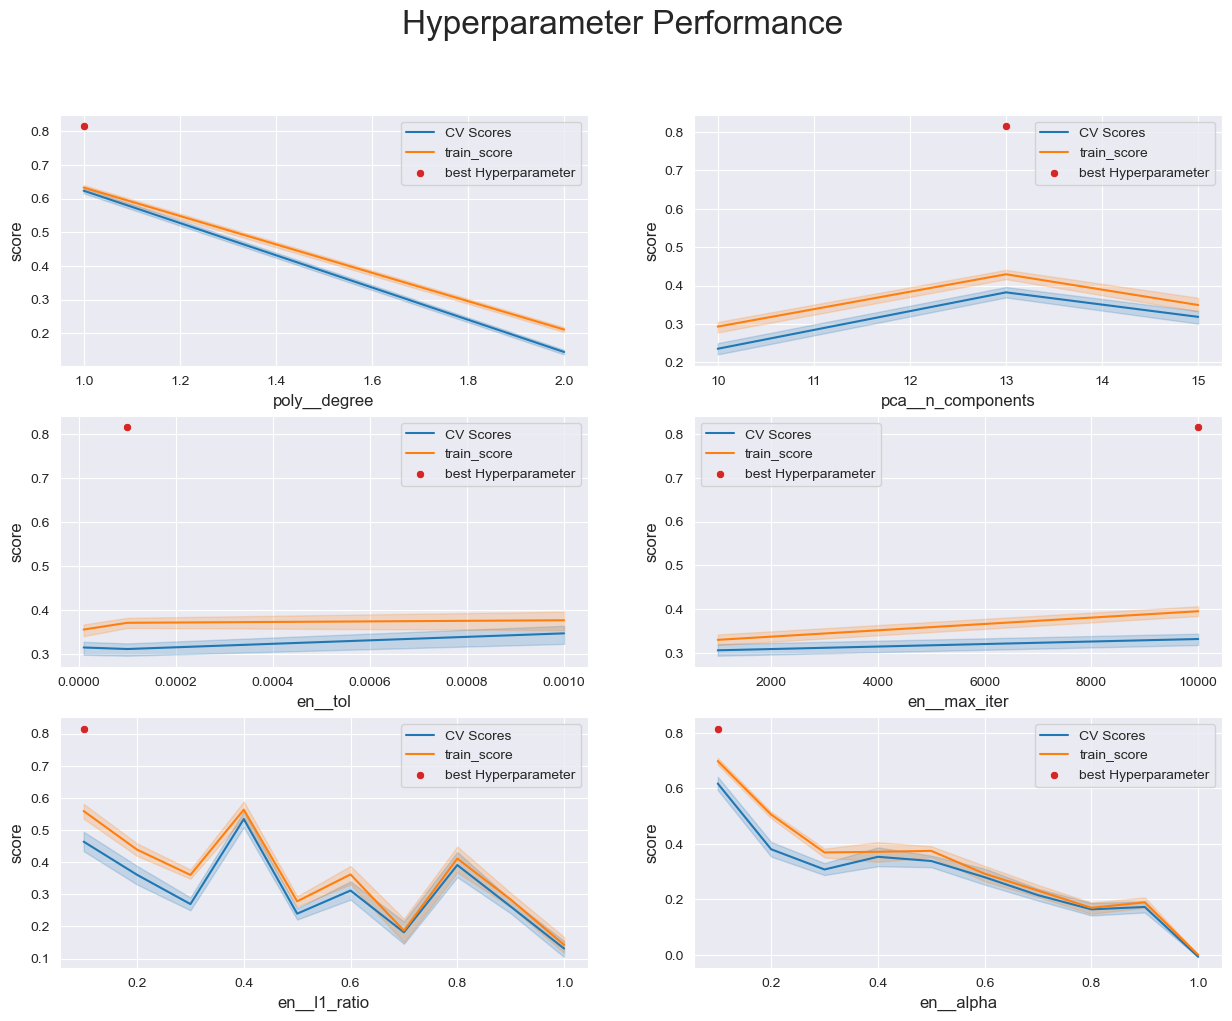

In [211]:
plot_hpperform(random_search,line_kws=dict(errorbar=('ci',40)),plot_train_score=True,points=False,best=True)
plt.show()

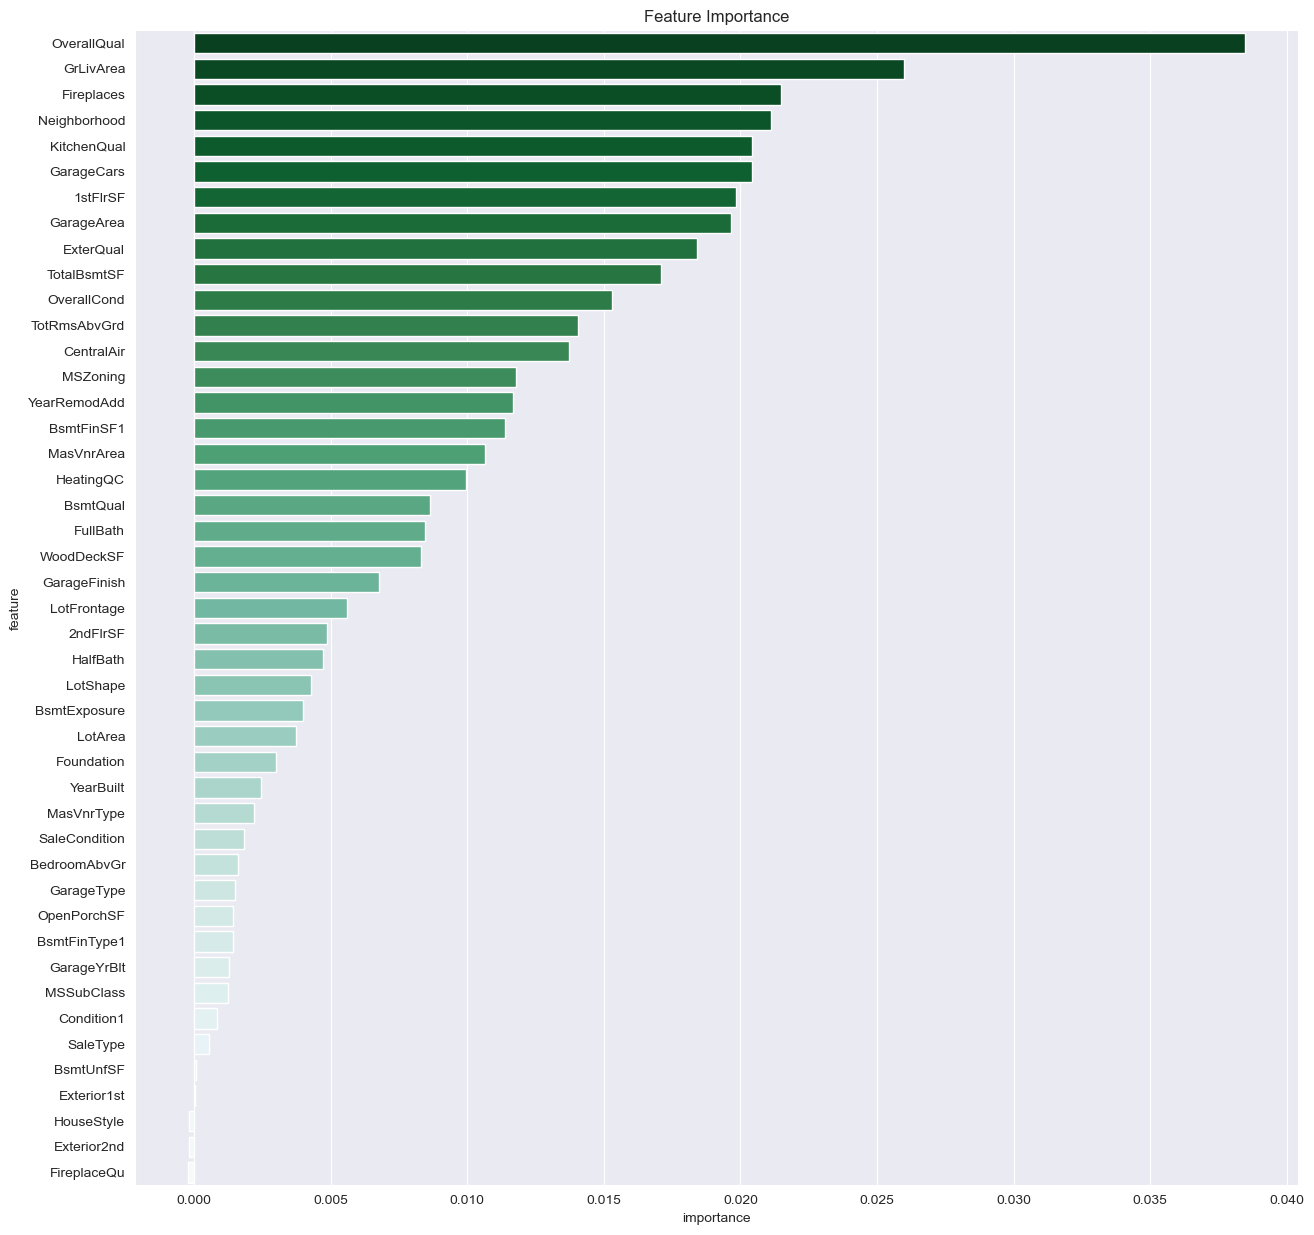

In [247]:
result = permutation_importance(random_search,X_test,y_test,n_repeats=10,random_state=seed)
feat_imp = pd.DataFrame({'feature':X_test.columns,'importance':result.importances_mean}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(data=feat_imp,x='importance',y='feature',hue='feature',palette='BuGn_r')
plt.title('Feature Importance')
plt.show()

In [279]:
en = Pipeline([
    ('poly',PolynomialFeatures(degree=1)),
    ('pca',PCA(n_components=13)),
    ('ss',StandardScaler()),
    ('en',ElasticNet(
        tol=0.001,
        max_iter=10000,
        l1_ratio=0.1,
        alpha=0.1
    ))
])

In [283]:
X_train_en = X_train[feat_imp[feat_imp.importance>0].feature]
X_test_en = X_test[X_train_en.columns]

In [285]:
en.fit(X_train_en, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('pca', PCA(n_components=13)), ('ss', StandardScaler()),
                ('en',
                 ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000,
                            tol=0.001))])

In [289]:
print('Train MSE: ',mean_squared_error(y_train,en.predict(X_train_en)))
print('Test MSE: ',mean_squared_error(y_test,en.predict(X_test_en)))
print('Trian R2 Score: ',r2_score(y_train,en.predict(X_train_en)))
print('Test R2 Score: ',r2_score(y_test,en.predict(X_test_en)))

Train MSE:  0.15490929552919874
Test MSE:  0.16063008495173917
Trian R2 Score:  0.8450907044708011
Test R2 Score:  0.8604480383080455


### Support Vector Machine

#### Linear Kernel SVC

In [110]:
svr_lin = Pipeline([
    ('pca',PCA()),
    ('svr_lin',SVR(kernel='linear'))
])

In [122]:
param_dist = {
    'svr_lin__C': np.arange(0.01,0.11,0.01),
    'pca__n_components':np.arange(10,45)
}

random_search = RandomizedSearchCV(
    svr_lin,
    n_iter=150,
    param_distributions = param_dist,
    return_train_score=True,
    n_jobs=-1,
    random_state=seed
)

In [124]:
random_search.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                             ('svr_lin',
                                              SVR(kernel='linear'))]),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44]),
                                        'svr_lin__C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])},
                   random_state=42, return_train_score=True)

In [125]:
random_search.best_params_

{'svr_lin__C': 0.05, 'pca__n_components': 37}

In [126]:
print('Train MSE: ',mean_squared_error(y_train,random_search.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,random_search.predict(X_test)))
print('CV R2 Score: ',random_search.best_score_)
print('Trian R2 Score: ',r2_score(y_train,random_search.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,random_search.predict(X_test)))

Train MSE:  0.1364257695740665
Test MSE:  0.10542798019478203
CV R2 Score:  0.8495100911485809
Trian R2 Score:  0.8635742304259335
Test R2 Score:  0.9084064391933632


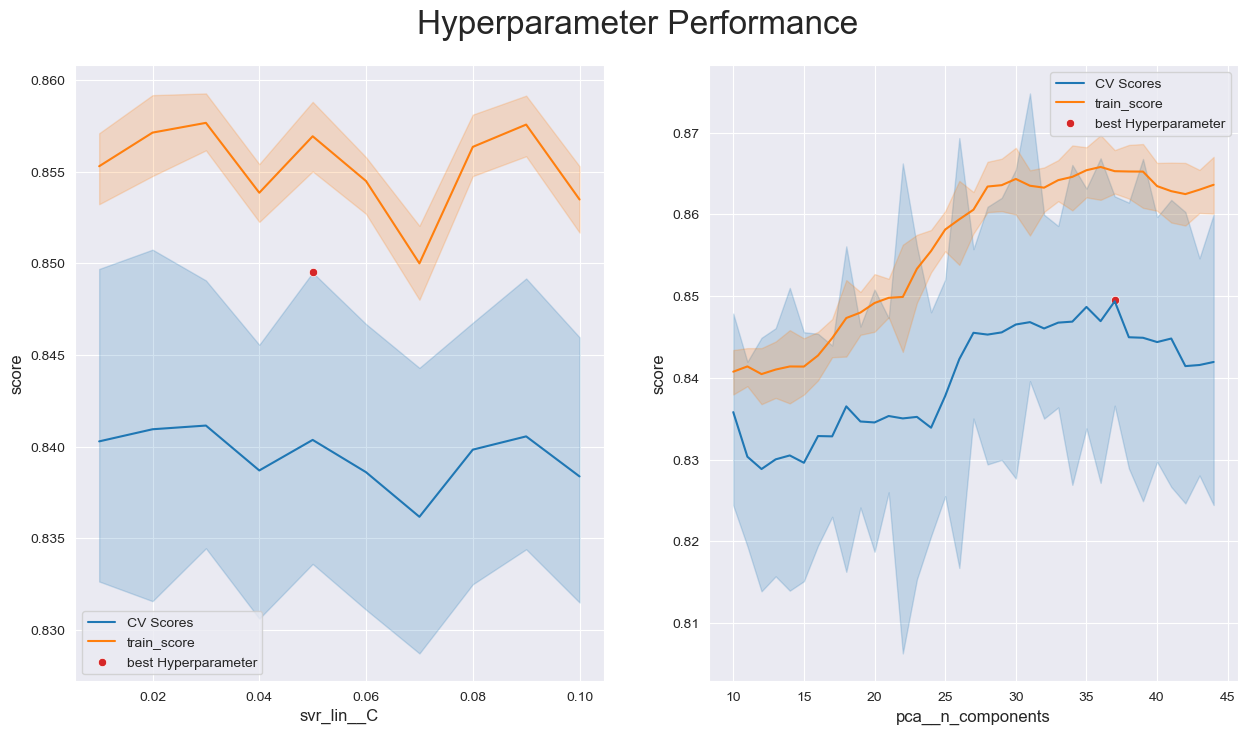

In [127]:
plot_hpperform(random_search,row=1,col=2,figsize=(15,8),line_kws=dict(errorbar=('ci',40)),plot_train_score=True,points=False,best=True)
plt.show()

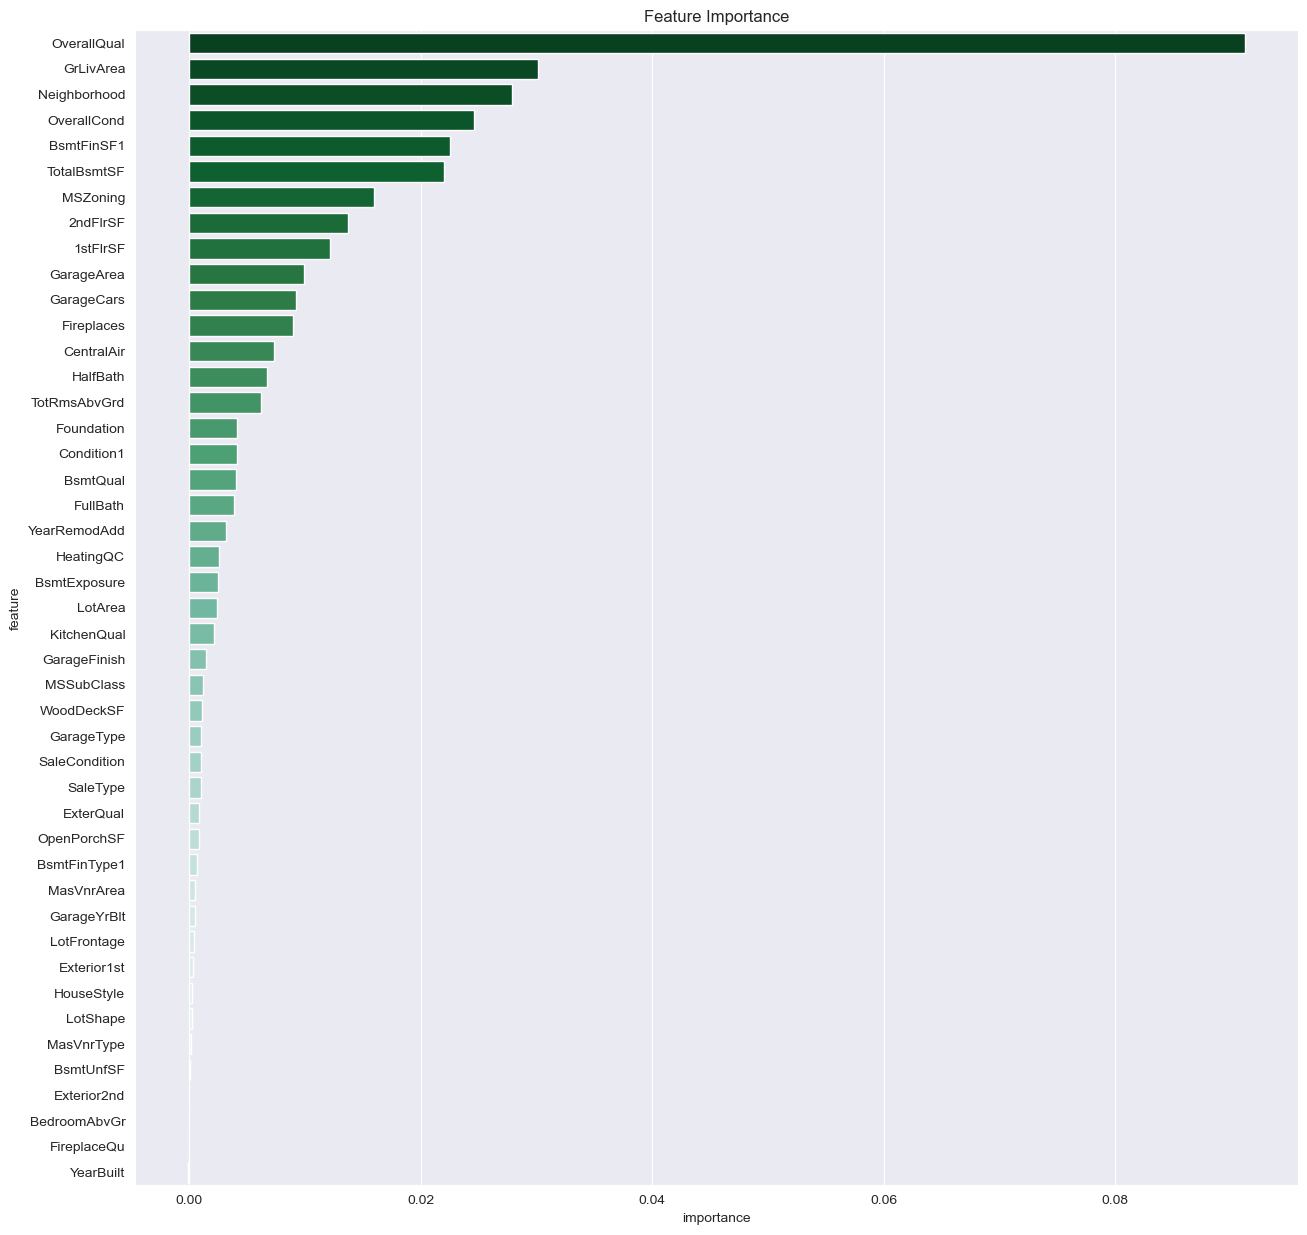

In [132]:
result = permutation_importance(random_search,X_test,y_test,n_repeats=10,random_state=seed)
feat_imp = pd.DataFrame({'feature':X_test.columns,'importance':result.importances_mean}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(data=feat_imp,x='importance',y='feature',hue='feature',palette='BuGn_r')
plt.title('Feature Importance')
plt.show()

In [134]:
svr_lin = Pipeline([
    ('pca',PCA(n_components=37)),
    ('svr_lin',SVR(kernel='linear',C=0.01))
])

In [136]:
svr_lin.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('pca', PCA(n_components=37)),
                ('svr_lin', SVR(C=0.01, kernel='linear'))])

In [138]:
print('Train MSE: ',mean_squared_error(y_train,svr_lin.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,svr_lin.predict(X_test)))
print('Trian R2 Score: ',r2_score(y_train,svr_lin.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,svr_lin.predict(X_test)))

Train MSE:  0.1360755790041551
Test MSE:  0.10604952813056535
Trian R2 Score:  0.8639244209958449
Test R2 Score:  0.9078664517199692


#### Polynomial Kernel SVC

In [359]:
param_dist = {
    'C': np.arange(0.1,1,0.1),
    'degree': [1,2],
    'gamma':np.arange(1,0.1,-0.1),
    'coef0':np.arange(-1,1,0.1)
}

random_search = RandomizedSearchCV(
    SVR(
        kernel='poly',
    ),
    n_iter=150,
    param_distributions = param_dist,
    return_train_score=True,
    n_jobs=-1,
    random_state=seed
)
    

In [361]:
random_search.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=SVR(kernel='poly'), n_iter=150, n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'coef0': array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
                                        'degree': [1, 2],
                                        'gamma': array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])},
                   random_state=42, return_train_score=True)

In [362]:
random_search.best_params_

{'gamma': 0.20000000000000018,
 'degree': 1,
 'coef0': 0.6999999999999997,
 'C': 0.1}

In [365]:
print('Train MSE: ',mean_squared_error(y_train,random_search.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,random_search.predict(X_test)))
print('CV R2 Score: ',random_search.best_score_)
print('Trian R2 Score: ',r2_score(y_train,random_search.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,random_search.predict(X_test)))

Train MSE:  0.1366152345662369
Test MSE:  0.10713514767316794
CV R2 Score:  0.8427538213769754
Trian R2 Score:  0.8633847654337631
Test R2 Score:  0.9069232888195273


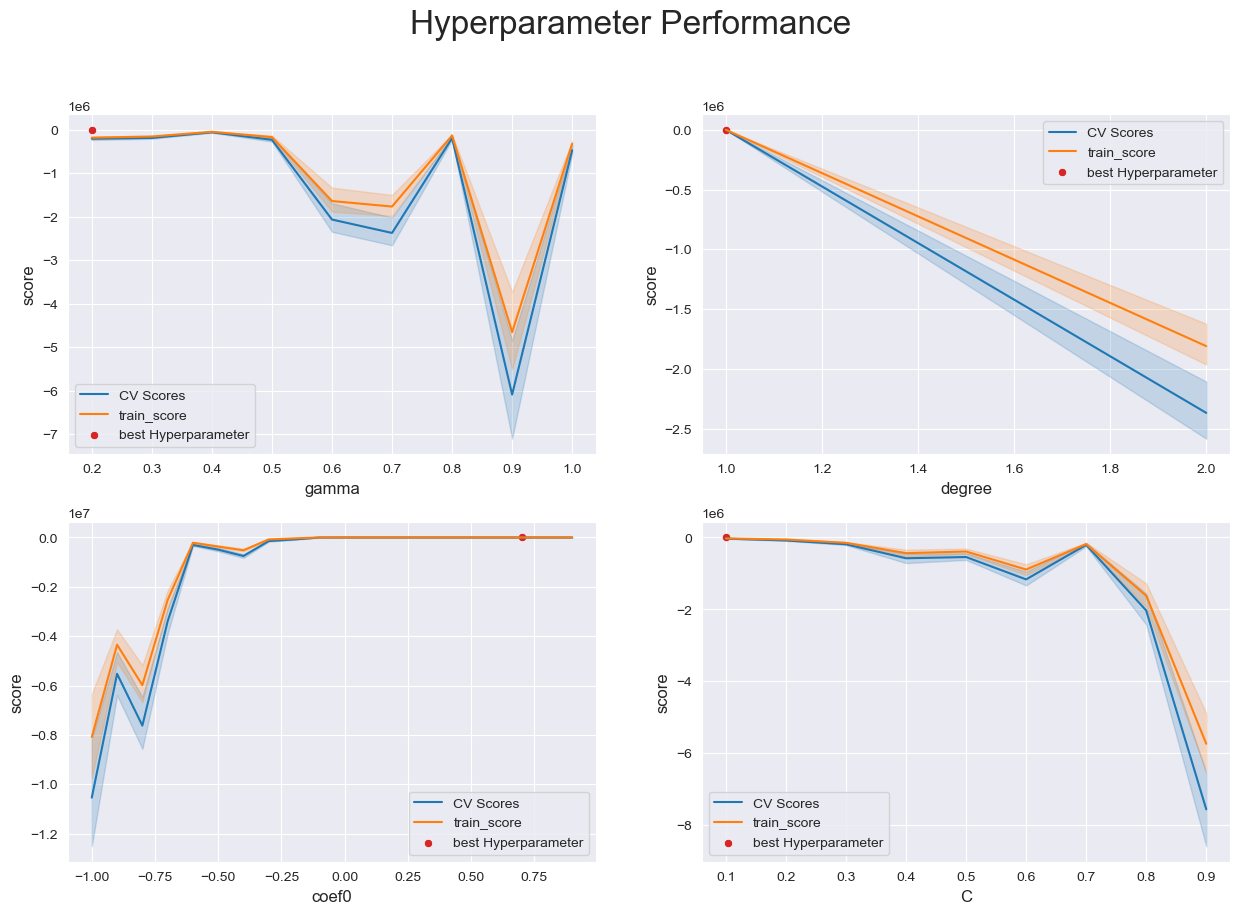

In [367]:
plot_hpperform(random_search,line_kws=dict(errorbar=('ci',40)),plot_train_score=True,points=False,best=True)
plt.show()

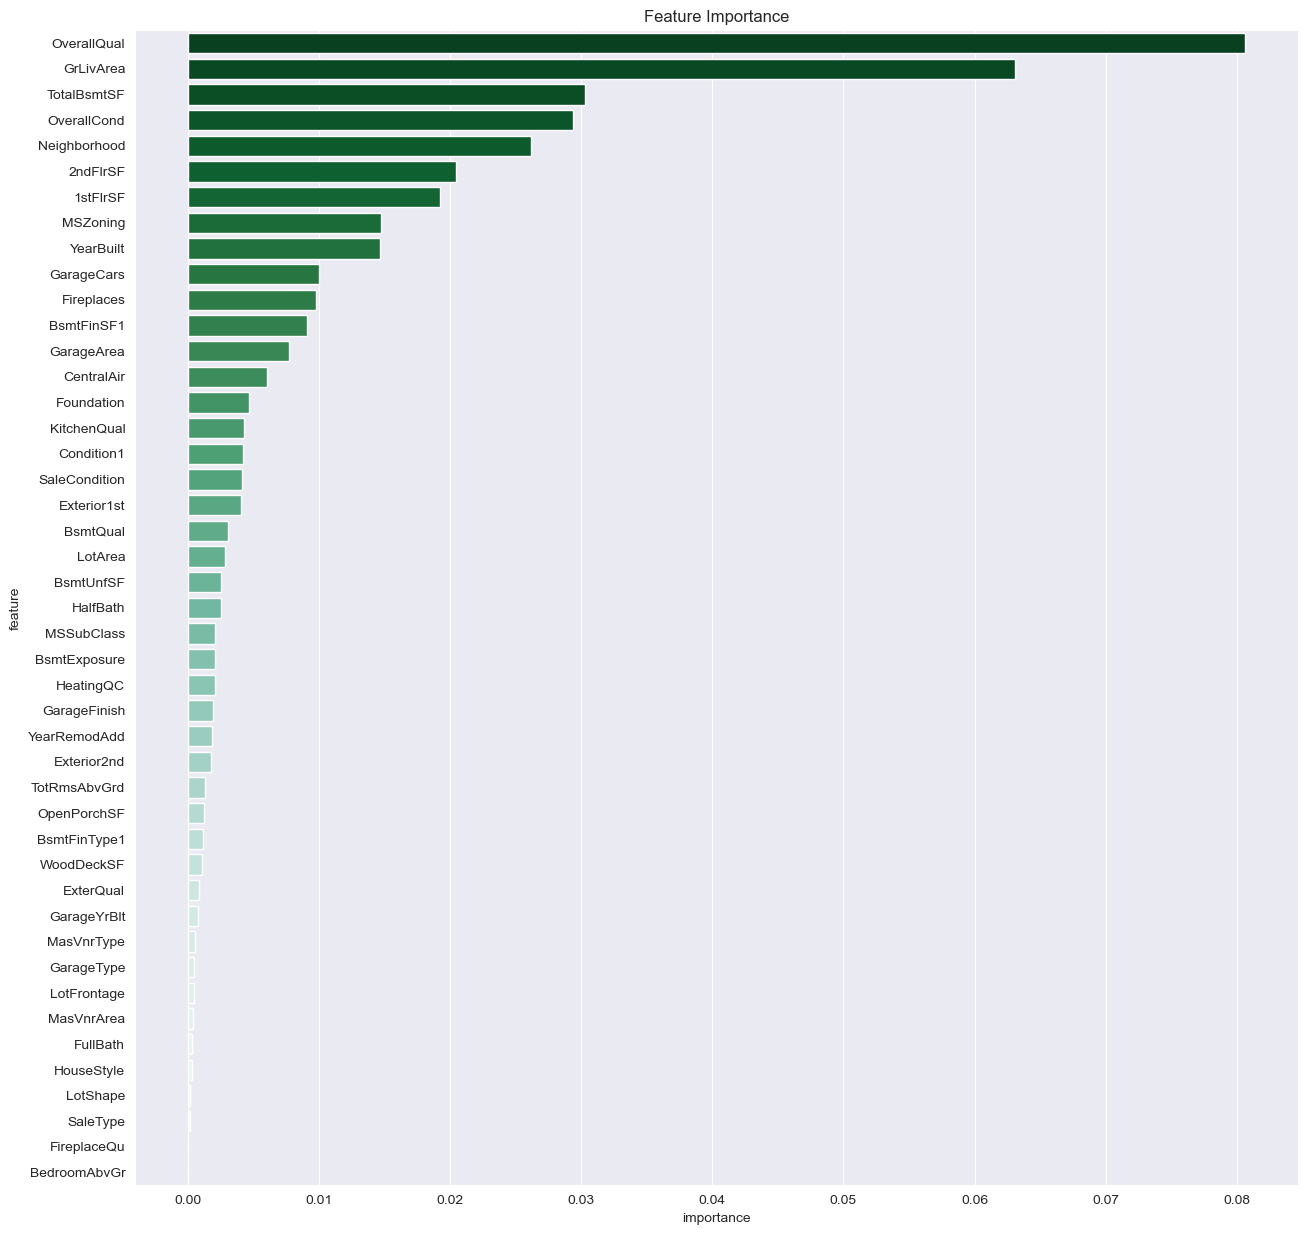

In [401]:
result = permutation_importance(random_search,X_test,y_test,n_repeats=10,random_state=seed)
feat_imp = pd.DataFrame({'feature':X_test.columns,'importance':result.importances_mean}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(data=feat_imp,x='importance',y='feature',hue='feature',palette='BuGn_r')
plt.title('Feature Importance')
plt.show()

In [585]:
svr_poly = SVR(
    C=0.1,
    kernel='poly',
    degree=1,
    gamma=0.2,
    coef0=-0.25
    )

In [587]:
svr_poly.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, coef0=-0.25, degree=1, gamma=0.2, kernel='poly')

In [589]:
print('Train MSE: ',mean_squared_error(y_train,svr_poly.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,svr_poly.predict(X_test)))
print('Trian R2 Score: ',r2_score(y_train,svr_poly.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,svr_poly.predict(X_test)))

Train MSE:  0.13665377762399436
Test MSE:  0.10717216184751185
Trian R2 Score:  0.8633462223760056
Test R2 Score:  0.9068911317012536


### rbf Kernel SVC

In [469]:
param_dist = {
    'C': np.arange(0.1,1,0.1),
    'gamma':np.arange(1,0,-0.01),
}

random_search = RandomizedSearchCV(
    SVR(
        kernel='rbf'
    ),
    n_iter=150,
    param_distributions = param_dist,
    return_train_score=True,
    n_jobs=-1,
    random_state=seed
)   

In [471]:
random_search.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=SVR(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])},
                   random_state=42, return_train_score=True)

In [472]:
random_search.best_params_

{'gamma': 0.00999999999999912, 'C': 0.30000000000000004}

In [473]:
print('Train MSE: ',mean_squared_error(y_train,random_search.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,random_search.predict(X_test)))
print('CV R2 Score: ',random_search.best_score_)
print('Trian R2 Score: ',r2_score(y_train,random_search.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,random_search.predict(X_test)))

Train MSE:  0.09082509005443651
Test MSE:  0.1365043633939464
CV R2 Score:  0.8812475041123227
Trian R2 Score:  0.9091749099455635
Test R2 Score:  0.8814079461088501


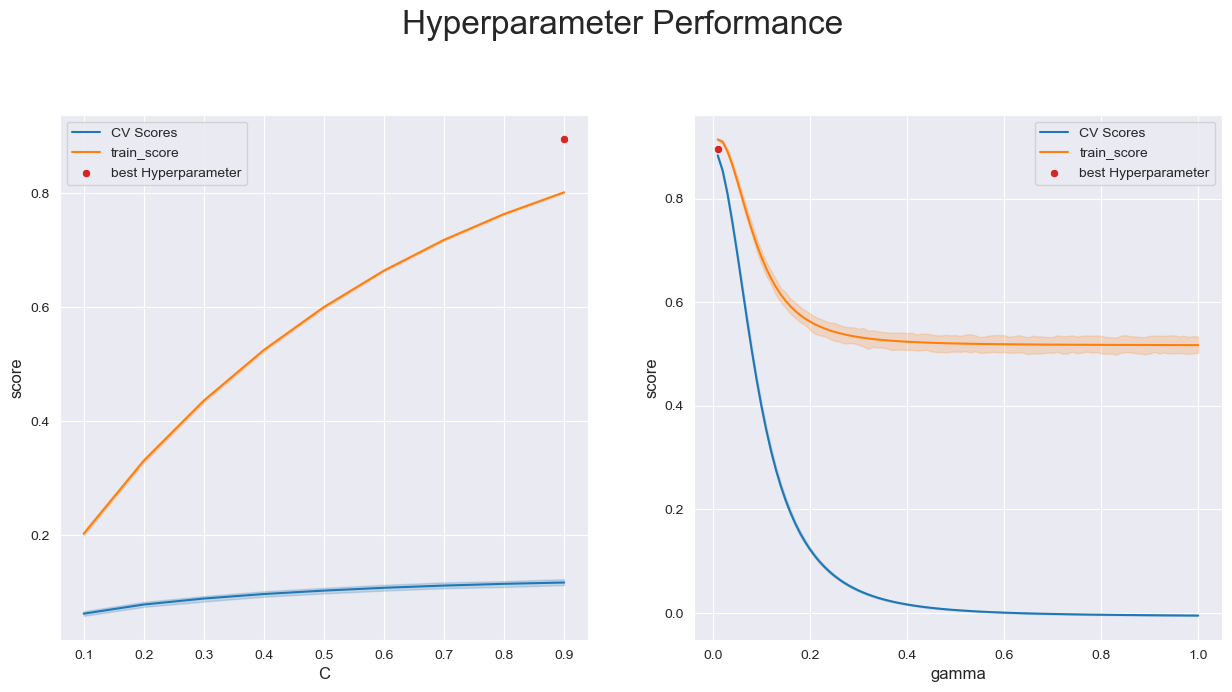

In [423]:
plot_hpperform(grid_search,line_kws=dict(errorbar=('ci',40)),plot_train_score=True,points=False,best=True)
plt.show()

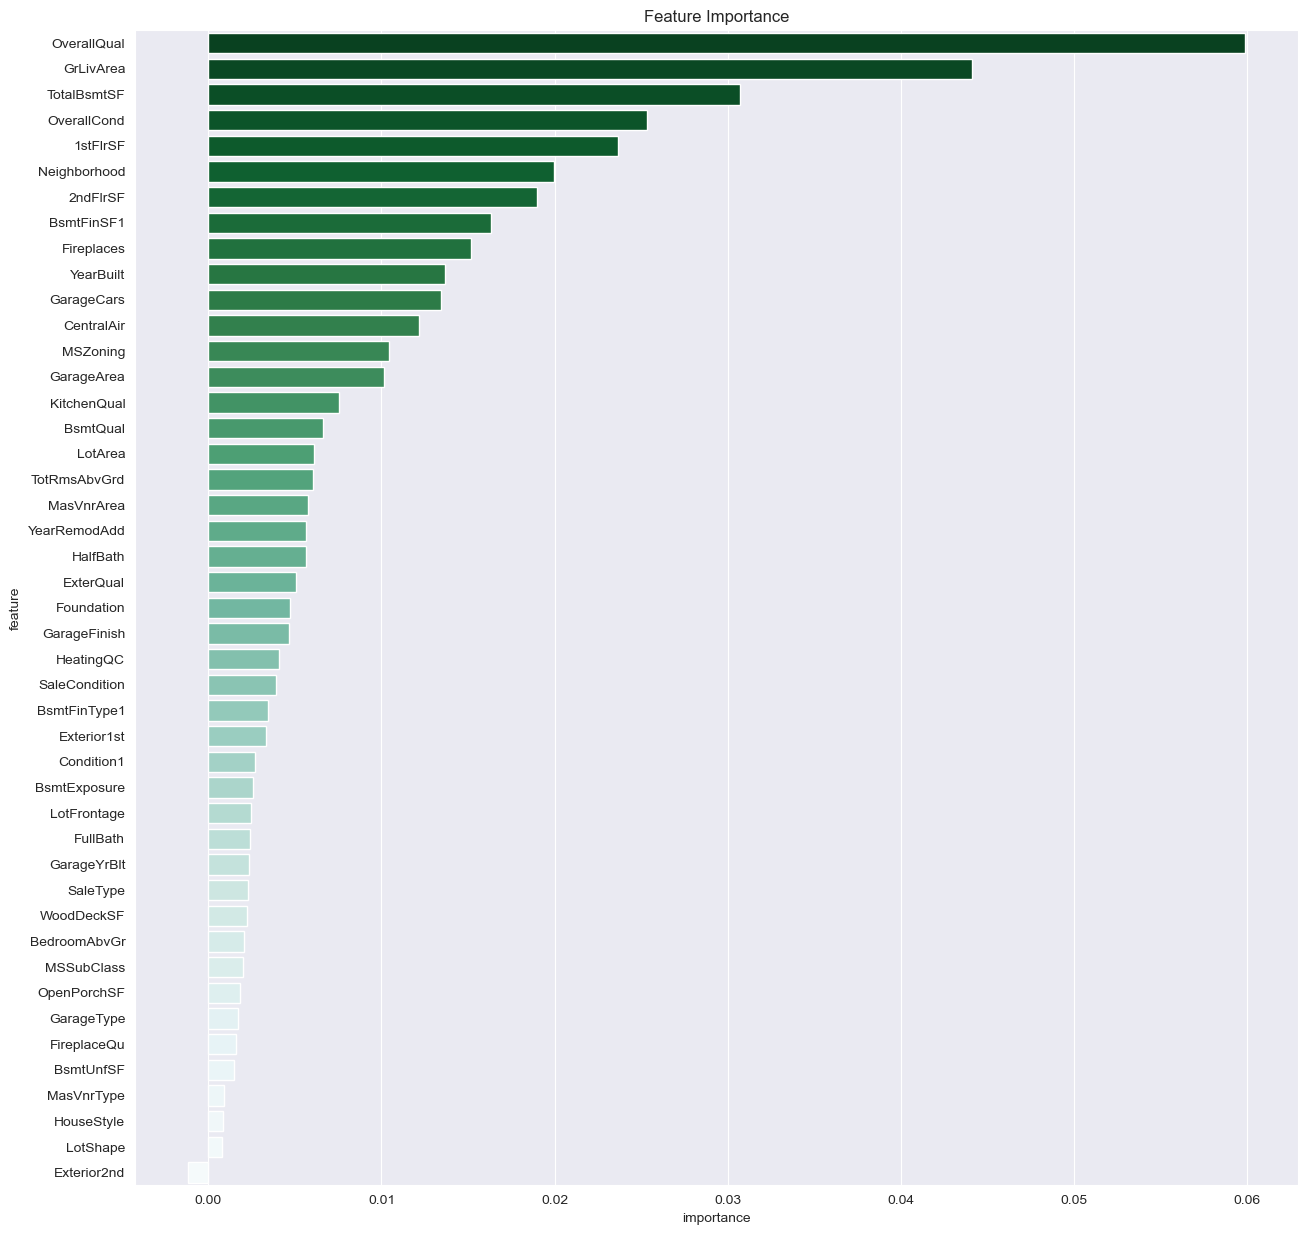

In [425]:
result = permutation_importance(random_search,X_test,y_test,n_repeats=10,random_state=seed)
feat_imp = pd.DataFrame({'feature':X_test.columns,'importance':result.importances_mean}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(data=feat_imp,x='importance',y='feature',hue='feature',palette='BuGn_r')
plt.title('Feature Importance')
plt.show()

In [495]:
svr_rbf = SVR(
    C=0.3,
    gamma=0.009,
    kernel='rbf'
    )

In [497]:
X_train_rbf = X_train.drop(columns='Exterior2nd')
X_test_rbf = X_test.drop(columns='Exterior2nd')

In [507]:
svr_rbf.fit(X_train_rbf,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.3, gamma=0.009)

In [509]:
print('Train MSE: ',mean_squared_error(y_train,svr_rbf.predict(X_train_rbf)))
print('Test MSE: ',mean_squared_error(y_test,svr_rbf.predict(X_test_rbf)))
print('Trian R2 Score: ',r2_score(y_train,svr_rbf.predict(X_train_rbf)))
print('Test R2 Score: ',r2_score(y_test,svr_rbf.predict(X_test_rbf)))

Train MSE:  0.09186779316084225
Test MSE:  0.13222724775158126
Trian R2 Score:  0.9081322068391577
Test R2 Score:  0.8851238121525911


#### sigmoid Kernel SVC

In [511]:
param_dist = {
    'C': np.arange(0.01,1,0.01),
    'gamma':np.arange(1,0,-0.01),
    'coef0':np.arange(-1,1,0.1)
}

random_search = RandomizedSearchCV(
    SVR(
        kernel='sigmoid'
    ),
    n_iter=150,
    param_distributions = param_dist,
    return_train_score=True,
    n_jobs=-1
)
    

In [513]:
random_search.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=SVR(kernel='sigmoid'), n_iter=150, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0...
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])},
                   return_train_score=True)

In [514]:
random_search.best_params_

{'gamma': 0.00999999999999912, 'coef0': -1.0, 'C': 0.56}

In [517]:
print('Train MSE: ',mean_squared_error(y_train,random_search.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,random_search.predict(X_test)))
print('CV R2 Score: ',random_search.best_score_)
print('Trian R2 Score: ',r2_score(y_train,random_search.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,random_search.predict(X_test)))

Train MSE:  0.21878616468140763
Test MSE:  0.09995940458828806
CV R2 Score:  0.8471867699673836
Trian R2 Score:  0.7812138353185922
Test R2 Score:  0.9131574200185074


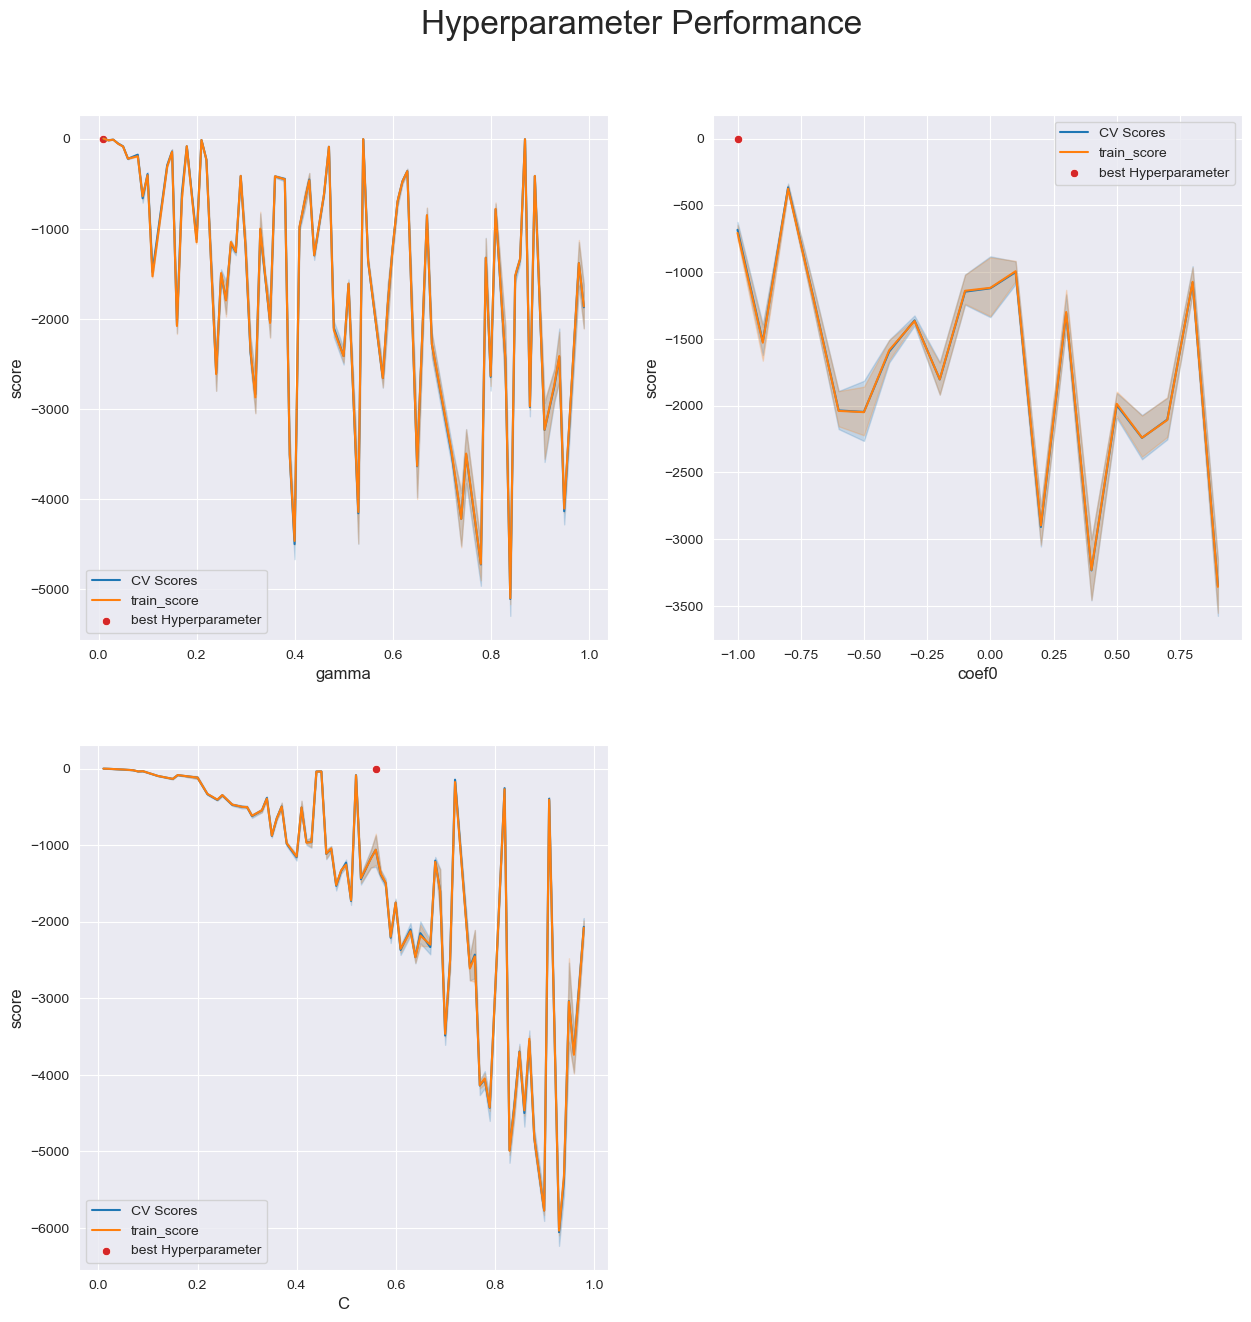

In [519]:
plot_hpperform(random_search,line_kws=dict(errorbar=('ci',40)),plot_train_score=True,points=False,best=True)
plt.show()

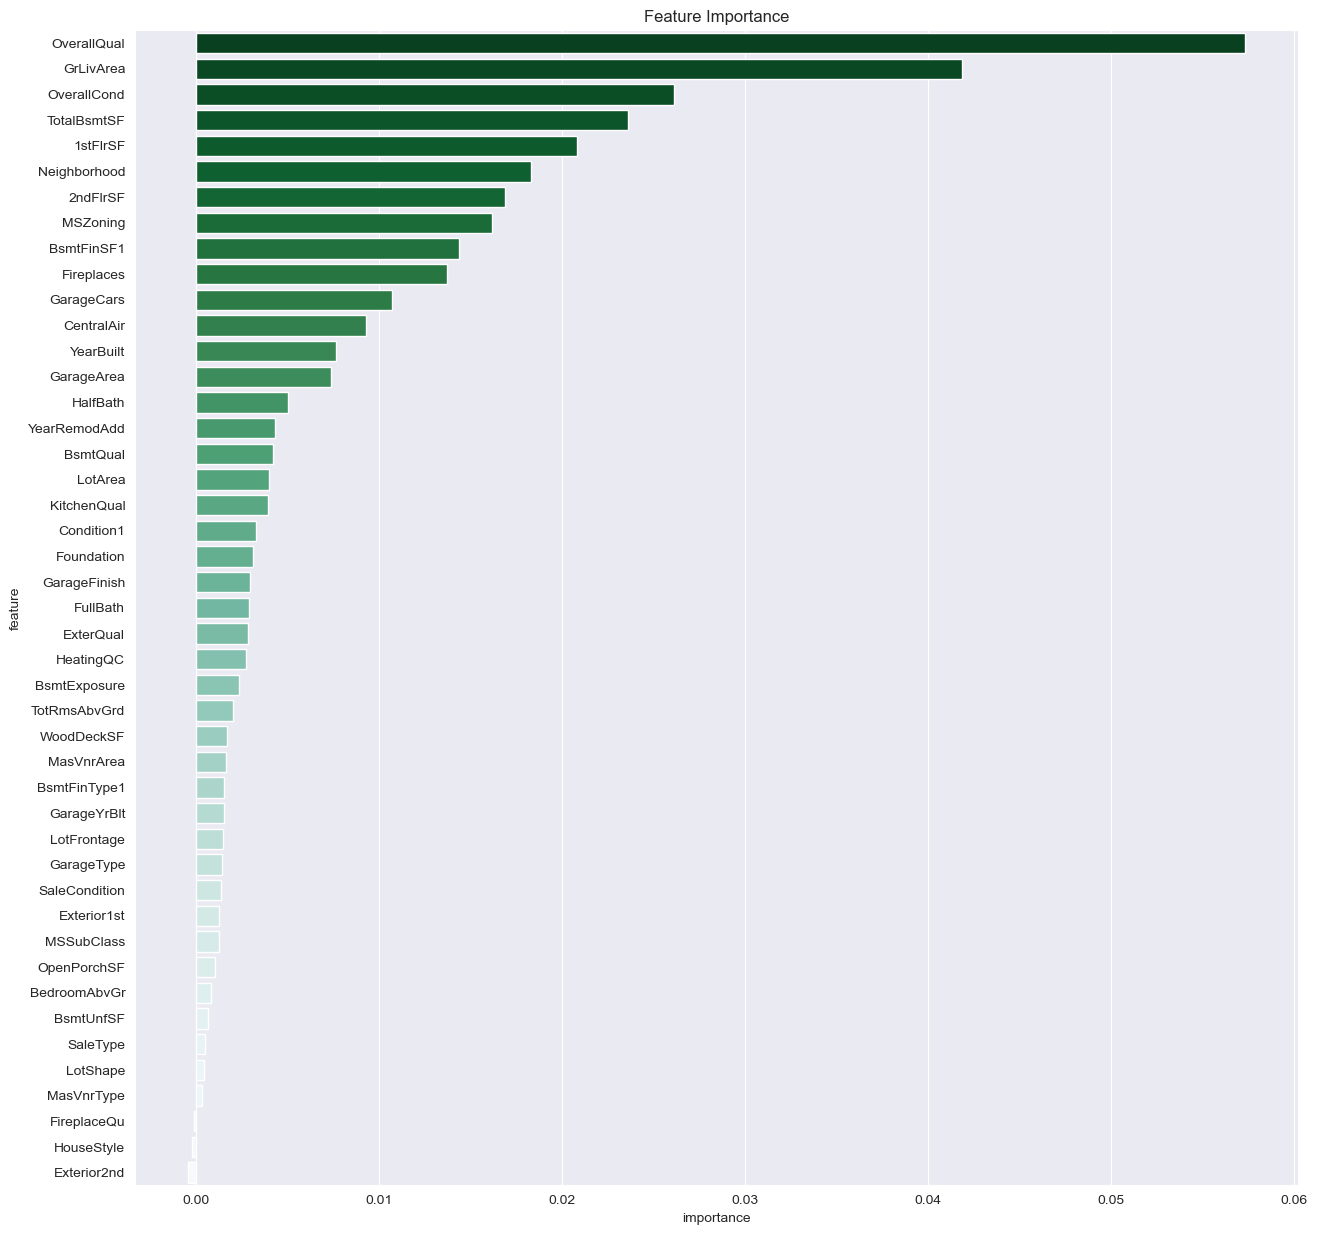

In [521]:
result = permutation_importance(random_search,X_test,y_test,n_repeats=10,random_state=seed)
feat_imp = pd.DataFrame({'feature':X_test.columns,'importance':result.importances_mean}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(data=feat_imp,x='importance',y='feature',hue='feature',palette='BuGn_r')
plt.title('Feature Importance')
plt.show()

In [525]:
svr_sig = SVR(
    C=0.8,
    gamma=0.01,
    kernel='sigmoid',
    coef0=-0.8
    )

In [628]:
X_train_sig.columns

Index(['CentralAir', 'GrLivArea', 'Fireplaces', 'OverallCond', 'TotRmsAbvGrd',
       'OverallQual', 'BsmtFinSF1', 'MasVnrArea', '1stFlrSF', 'TotalBsmtSF',
       'BsmtExposure', '2ndFlrSF', 'GarageCars', 'FullBath', 'GarageArea',
       'BedroomAbvGr', 'LotFrontage', 'HalfBath', 'ExterQual', 'Neighborhood',
       'YearBuilt', 'MasVnrType', 'BsmtQual', 'KitchenQual', 'OpenPorchSF',
       'WoodDeckSF', 'Condition1', 'BsmtFinType1', 'SaleType', 'LotArea',
       'Foundation', 'SaleCondition', 'GarageFinish', 'BsmtUnfSF',
       'FireplaceQu', 'YearRemodAdd'],
      dtype='object')

In [561]:
X_train_sig = X_train[feat_imp[feat_imp.importance>0].feature]
X_test_sig = X_test[X_train_sig.columns]

In [563]:
svr_sig.fit(X_train_sig,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.8, coef0=-0.8, gamma=0.01, kernel='sigmoid')

In [565]:
print('Train MSE: ',mean_squared_error(y_train,svr_sig.predict(X_train_sig)))
print('Test MSE: ',mean_squared_error(y_test,svr_sig.predict(X_test_sig)))
print('Trian R2 Score: ',r2_score(y_train,svr_sig.predict(X_train_sig)))
print('Test R2 Score: ',r2_score(y_test,svr_sig.predict(X_test_sig)))

Train MSE:  0.31511296057771615
Test MSE:  0.1085601839939321
Trian R2 Score:  0.6848870394222837
Test R2 Score:  0.9056852479251041


### KNN

In [533]:
param_dist = {
    'n_neighbors': np.arange(1,11),
    'weights':['uniform','distance'],
    'algorithm':['ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(1,55,5)
}

random_search = RandomizedSearchCV(
    KNeighborsRegressor(
        n_jobs=-1
    ),
    n_iter=150,
    param_distributions = param_dist,
    return_train_score=True,
    n_jobs=-1
)

In [535]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True)

In [536]:
random_search.best_params_

{'weights': 'distance',
 'n_neighbors': 6,
 'leaf_size': 31,
 'algorithm': 'kd_tree'}

In [539]:
print('Train MSE: ',mean_squared_error(y_train,random_search.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test,random_search.predict(X_test)))
print('CV R2 Score: ',random_search.best_score_)
print('Trian R2 Score: ',r2_score(y_train,random_search.predict(X_train)))
print('Test R2 Score: ',r2_score(y_test,random_search.predict(X_test)))

Train MSE:  0.0
Test MSE:  0.19556557035430408
CV R2 Score:  0.8131627281448633
Trian R2 Score:  1.0
Test R2 Score:  0.8300968402615939


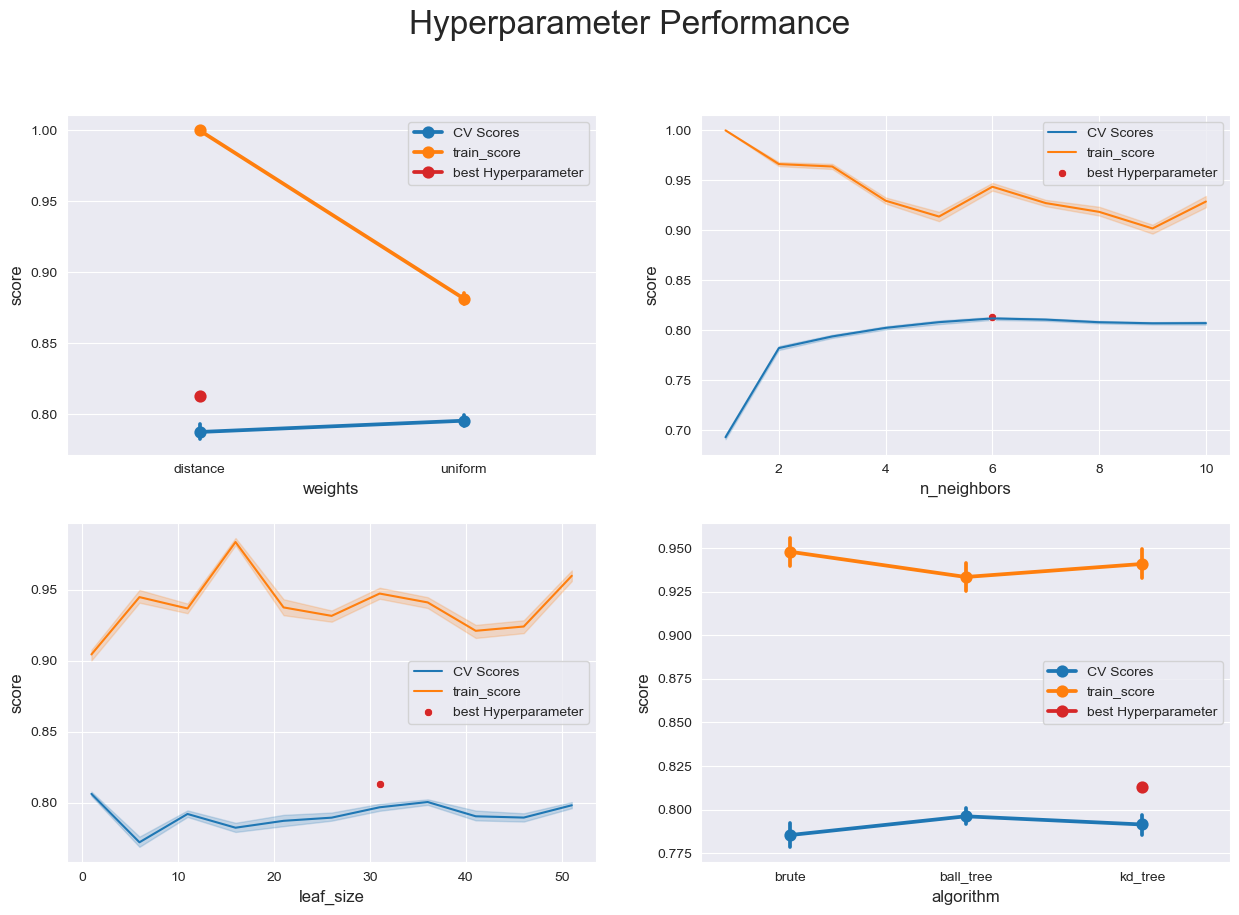

In [541]:
plot_hpperform(random_search,line_kws=dict(errorbar=('ci',40)),plot_train_score=True,points=False,best=True)
plt.show()

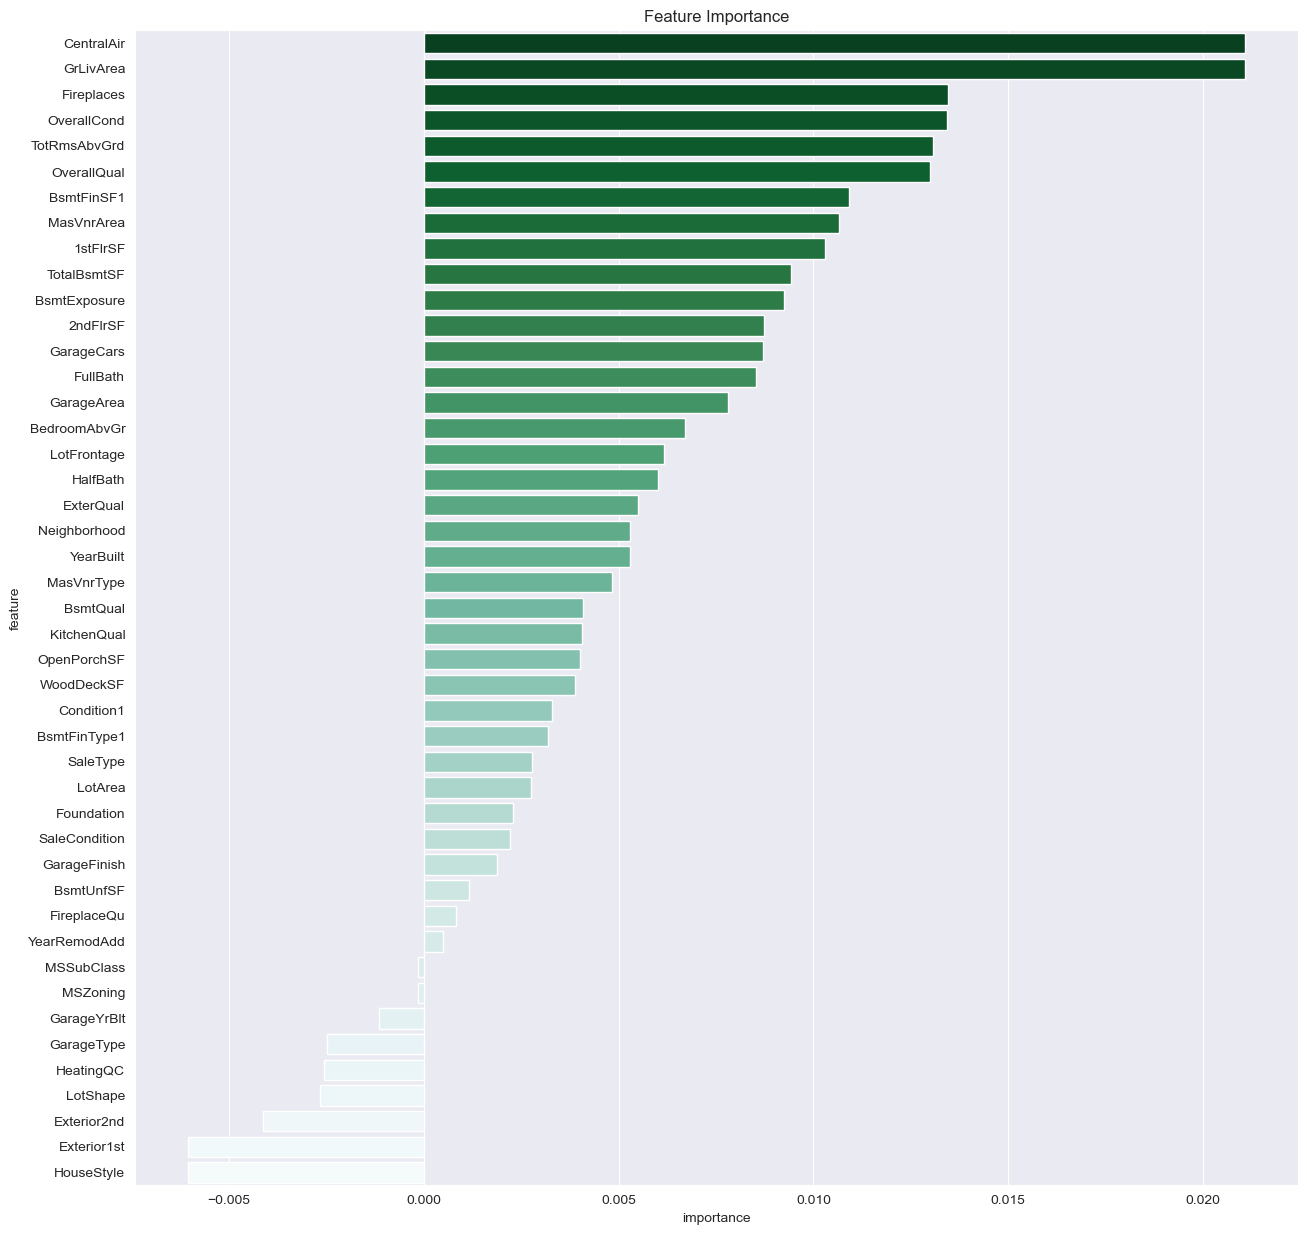

In [543]:
result = permutation_importance(random_search,X_test,y_test,n_repeats=10,random_state=seed)
feat_imp = pd.DataFrame({'feature':X_test.columns,'importance':result.importances_mean}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(data=feat_imp,x='importance',y='feature',hue='feature',palette='BuGn_r')
plt.title('Feature Importance')
plt.show()

In [567]:
knn = KNeighborsRegressor(
    weights= 'uniform',
    n_neighbors= 6,
    algorithm= 'ball_tree',
    n_jobs=-1
    )

In [630]:
X_train_knn.columns

Index(['CentralAir', 'GrLivArea', 'Fireplaces', 'OverallCond', 'TotRmsAbvGrd',
       'OverallQual', 'BsmtFinSF1', 'MasVnrArea', '1stFlrSF', 'TotalBsmtSF',
       'BsmtExposure', '2ndFlrSF', 'GarageCars', 'FullBath', 'GarageArea',
       'BedroomAbvGr', 'LotFrontage', 'HalfBath', 'ExterQual', 'Neighborhood',
       'YearBuilt', 'MasVnrType', 'BsmtQual', 'KitchenQual', 'OpenPorchSF',
       'WoodDeckSF', 'Condition1', 'BsmtFinType1', 'SaleType', 'LotArea',
       'Foundation', 'SaleCondition', 'GarageFinish', 'BsmtUnfSF',
       'FireplaceQu', 'YearRemodAdd'],
      dtype='object')

In [569]:
X_train_knn = X_train[feat_imp[feat_imp.importance>0].feature]
X_test_knn = X_test[X_train_knn.columns]

In [571]:
knn.fit(X_train_knn,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_jobs=-1, n_neighbors=6)

In [573]:
print('Train MSE: ',mean_squared_error(y_train,knn.predict(X_train_knn)))
print('Test MSE: ',mean_squared_error(y_test,knn.predict(X_test_knn)))
print('Trian R2 Score: ',r2_score(y_train,knn.predict(X_train_knn)))
print('Test R2 Score: ',r2_score(y_test,knn.predict(X_test_knn)))

Train MSE:  0.12625323997445054
Test MSE:  0.1658453063582624
Trian R2 Score:  0.8737467600255494
Test R2 Score:  0.8559171661606713


### Model Comparison 

In [575]:
def score_compare(models,scores,X,y):

    import pandas as pd
    
    if not isinstance(models,dict):
        raise Exception('Prove the model and model name in a dictionary format')
    if not isinstance(scores,list):
        scores = [scores]


    model_names = list(models.keys())
    score_names = [score.__name__ for score in scores]
    
    output = pd.DataFrame(index=model_names,columns=score_names)
    
    for m in range(len(models)):
        for s in range(len(scores)):
            output.loc[model_names[m],score_names[s]] = scores[s](y,models[model_names[m]].predict(X[models[model_names[m]].feature_names_in_]))
    return output
    

In [591]:
models = {'Elastic Net':en,
          'SVC Linear Kernel':svr_lin,
          'SVC Polynomial Kernel':svr_poly,
          'SVC RBF Kernel':svr_rbf,
          'SVC Sigmoid Kernel':svr_sig,
          'K-Nearest Neighbor':knn}

In [597]:
score_compare(models,[r2_score, mean_absolute_error, mean_squared_error],X_test,y_test)

,r2_score,mean_absolute_error,mean_squared_error
Elastic Net,0.860448,0.274008,0.16063
SVC Linear Kernel,0.90729,0.219241,0.106713
SVC Polynomial Kernel,0.906891,0.219962,0.107172
SVC RBF Kernel,0.885124,0.231149,0.132227
SVC Sigmoid Kernel,0.905685,0.218367,0.10856
K-Nearest Neighbor,0.855917,0.283807,0.165845


### Model Significance Test

In [615]:
cv_scores = {}
for name,model in models.items():
    scores = cross_val_score(model, X_val, y_val.values.flatten(), cv=5, scoring="r2")
    cv_scores[name] = scores

f_stat, pval = f_oneway(
    cv_scores['Elastic Net'],
    cv_scores['SVC Linear Kernel'],
    cv_scores['SVC Polynomial Kernel'],
    cv_scores['SVC RBF Kernel'],
    cv_scores['SVC Sigmoid Kernel'],
    cv_scores['K-Nearest Neighbor'],
    
                       )
print('ANOVA f-statistics ',f_stat,' p-value ',pval)

ANOVA f-statistics  9.303885904406979  p-value  4.9758442626132524e-05


From the one way anova test we can understand that the models have some significant difference in performance

In [620]:
scores = np.concatenate([cv_scores['Elastic Net'],
                         cv_scores['SVC Linear Kernel'],
                         cv_scores['SVC Polynomial Kernel'],
                         cv_scores['SVC RBF Kernel'],
                         cv_scores['SVC Sigmoid Kernel'], 
                         cv_scores['K-Nearest Neighbor']
                        ])
models = ['Elastic Net']*5 + ['SVC Linear Kernel']*5 + ['SVC Polynomial Kernel']*5 + ['SVC RBF Kernel']*5 + ['SVC Sigmoid Kernel']*5 +['K-Nearest Neighbor']*5
tukey = pairwise_tukeyhsd(scores, models, alpha=0.05)
print(tukey.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
          Elastic Net    K-Nearest Neighbor  -0.1354 0.0044 -0.2365 -0.0343   True
          Elastic Net     SVC Linear Kernel   0.0165 0.9955 -0.0846  0.1176  False
          Elastic Net SVC Polynomial Kernel   0.0169  0.995 -0.0842   0.118  False
          Elastic Net        SVC RBF Kernel  -0.1127 0.0227 -0.2138 -0.0116   True
          Elastic Net    SVC Sigmoid Kernel   0.0116 0.9992 -0.0894  0.1127  False
   K-Nearest Neighbor     SVC Linear Kernel   0.1519 0.0013  0.0508   0.253   True
   K-Nearest Neighbor SVC Polynomial Kernel   0.1523 0.0012  0.0512  0.2534   True
   K-Nearest Neighbor        SVC RBF Kernel   0.0227 0.9808 -0.0784  0.1238  False
   K-Nearest Neighbor    SVC Sigmoid Kernel    0.147 0.0018  0.0459  0.2481   True
    

**SVC with either of the polynomial Kernel or sigmoid kernel or linear kernel is the best model.**